### QED-C Application-Oriented Benchmarks - Qiskit Version
The notebook contains a suite of application-oriented benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [2]:
min_qubits=8
max_qubits=31
skip_qubits=1
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
#backend_id="statevector_simulator"

hub="ibm-q"; group="open"; project="main"
provider_backend = None
# exec_options = {}

# firstly install ---> pip install qiskit-aer-gpu==0.13.2
# exec_options = {"device" : "GPU"}                         # to use single GPU 
exec_options = {"device" : "GPU", "blocking_qubits":15}     # to use multiple GPU

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples illustrate other backend execution options

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider (backend_id=CPU/QPU, device=cpu/qpu)
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":"cpu" }

# # An example using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # Fire Opal can be used to manage executions on other backends, as illustrated here
# import _common.executors.fire_opal_executor as fire_opal_executor
# from _common.executors.fire_opal_executor import FireOpalBackend
# ibm_backend_id = "ibmq_jakarta"
# backend_id = f"fire_opal_{ibm_backend_id}"
# provider_backend = FireOpalBackend(ibm_backend_id=ibm_backend_id, hub=hub, group=group, project=project, token=token)
# exec_options = {"executor": fire_opal_executor.run}


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


### using IBMQ hardware

In [3]:
# # # *** If using IBMQ hardware, run this once to authenticate

# from qiskit_ibm_provider import IBMProvider
# IBMProvider.save_account(token='Your-API-Token', overwrite = True)

# provider = IBMProvider()

# # display current supported backends
# # print(provider.backends())   #[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_kyiv')>]

# backend_id = "ibm_brisbane"  


### If qiskit-provider-aer module not found error is coming, try to uninstall and re-install qiskit-aer module

In [4]:
# pip uninstall qiskit-aer -y

In [5]:
# pip install qiskit-aer

In [6]:
# import sys
# sys.path.insert(1, "_common")
# import metrics
# ### Plot Metrics for a specific application

# metrics.plot_metrics_for_app(backend_id = "qasm_simulator", appname = "Deutsch-Jozsa", apiname="Qiskit", filters=None, options=None, suffix="")
# # metrics.plot_metrics_for_app(backend_id = "qasm_simulator", appname = "Bernstein-Vazirani (1)", apiname="Qiskit", filters=None, options=None, suffix="")

### Deutsch-Jozsa

Deutsch-Jozsa Benchmark Program - Qiskit
... execution starting at Sep 05, 2024 03:53:03 UTC
************
Executing [1] circuits with num_qubits = 8
************
Executing [1] circuits with num_qubits = 9
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 5, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 5, 0.0, 0.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.001, 0.583, 0.553 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 6, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 6, 0.0, 0.0
Average Creation, Elapsed, Execution Time for the 9 qubit group = 0.001, 0.044, 0.003 secs
Average Transpiling, Validating, Running Time

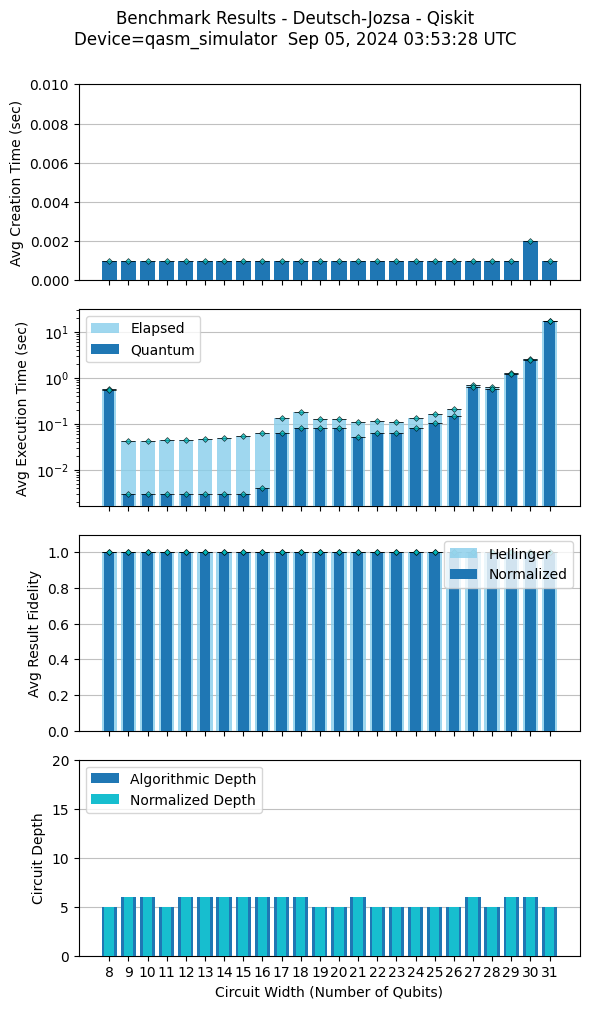

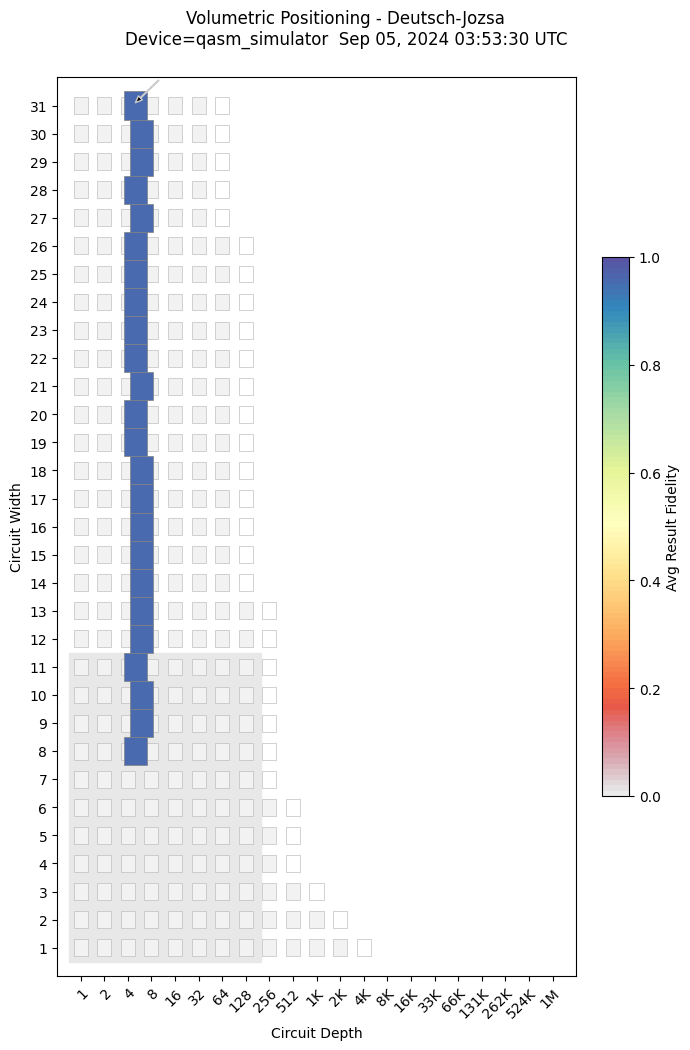

In [7]:
import sys
sys.path.insert(1, "deutsch-jozsa/qiskit")
import dj_benchmark
dj_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Bernstein-Vazirani - Method 1

Bernstein-Vazirani (1) Benchmark Program - Qiskit
... execution starting at Sep 05, 2024 03:53:31 UTC
************
Executing [1] circuits with num_qubits = 8
************
Executing [1] circuits with num_qubits = 9
************
Executing [1] circuits with num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 7, 0.1
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 7, 0.062, 2.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.001, 0.075, 0.007 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 11
************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 8, 0.13
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 8, 0.081, 3.0
Average Creation, Elapsed, Execution Time for the 9 qubit group =

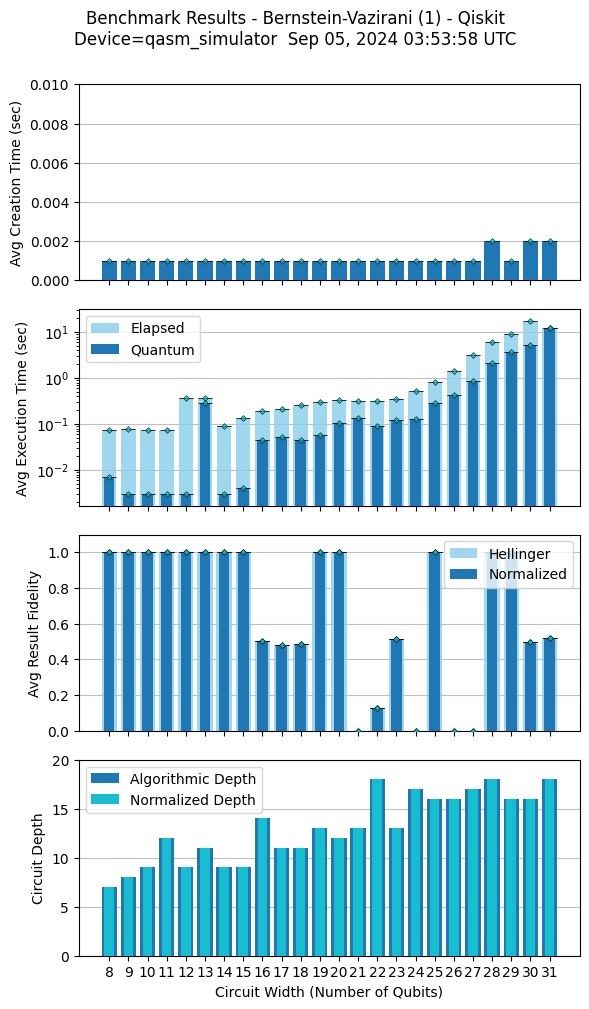

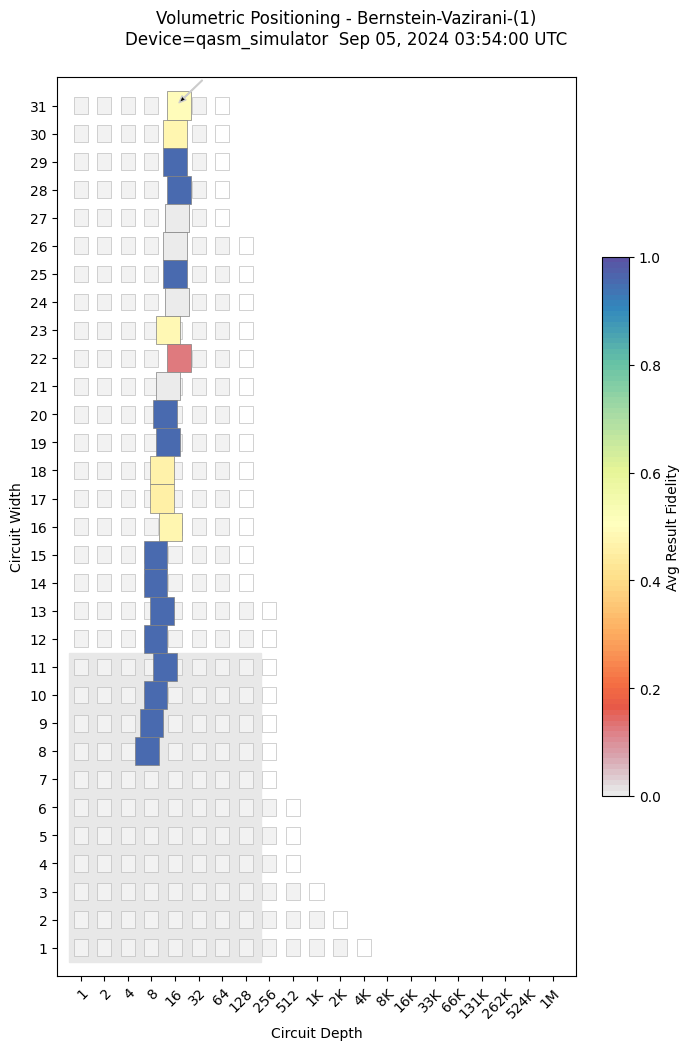

In [8]:
import sys
sys.path.insert(1, "bernstein-vazirani/qiskit")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Bernstein-Vazirani - Method 2

Bernstein-Vazirani (2) Benchmark Program - Qiskit
... execution starting at Sep 05, 2024 03:54:01 UTC
************
Executing [1] circuits with num_qubits = 8
************
Executing [1] circuits with num_qubits = 9
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 28, 0.19
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 35, 0.143, 4.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.0, 0.176, 0.143 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 24, 0.125
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 27, 0.105, 2.0
Average Creation, Elapsed, Execution Time for the 9 qubit group = 0.0, 0.164, 0.132 secs
Average Transpiling, Validati

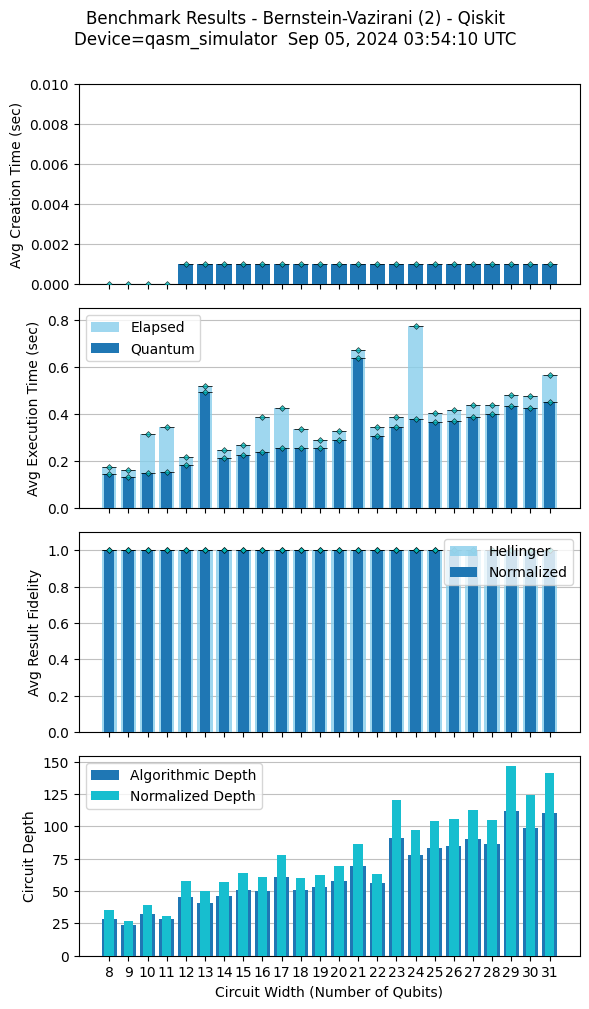

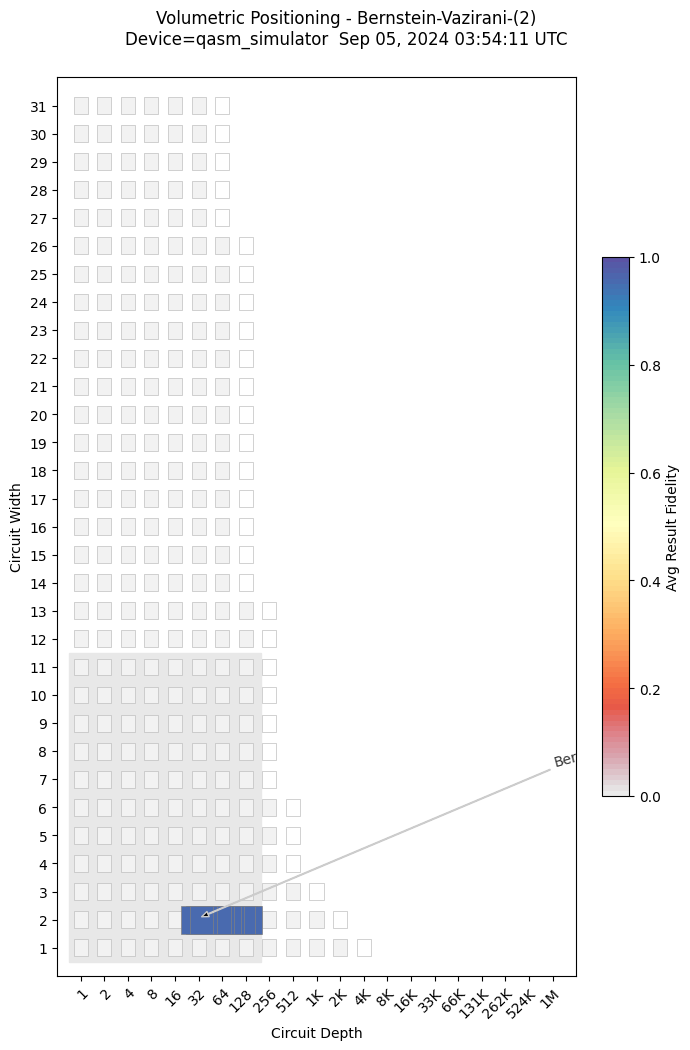

In [9]:
import sys
sys.path.insert(1, "bernstein-vazirani/qiskit")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hidden Shift

Hidden Shift Benchmark Program - Qiskit
... execution starting at Sep 05, 2024 03:54:12 UTC
************
Executing [1] circuits with num_qubits = 8
************
Executing [1] circuits with num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 8, 0.211
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 17, 0.089, 8.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.001, 0.045, 0.004 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 12
************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 8, 0.208
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 17, 0.094, 10.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.001, 0.05, 0.004 secs
Average Transpiling, Validating,

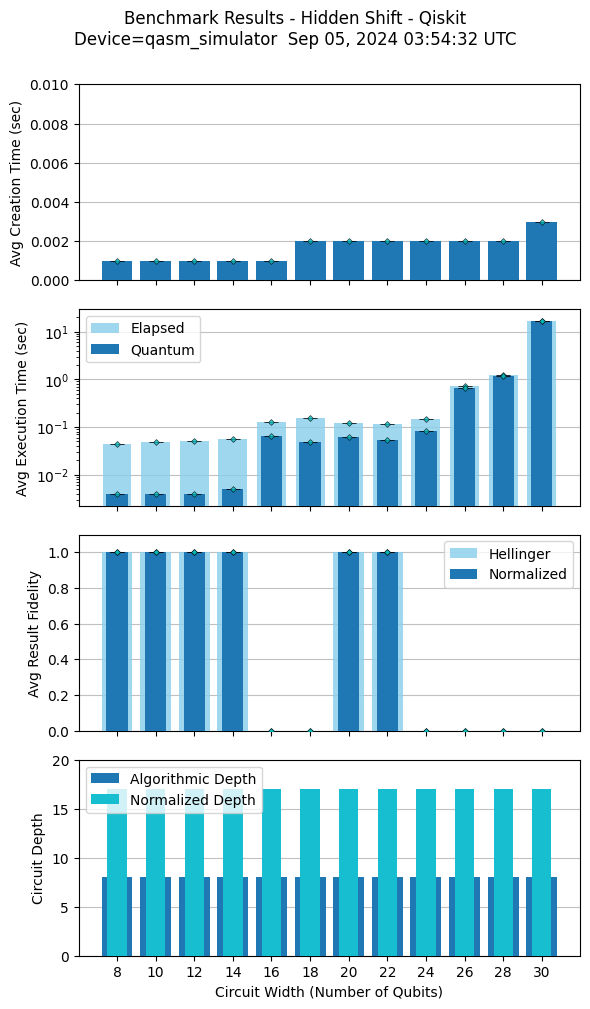

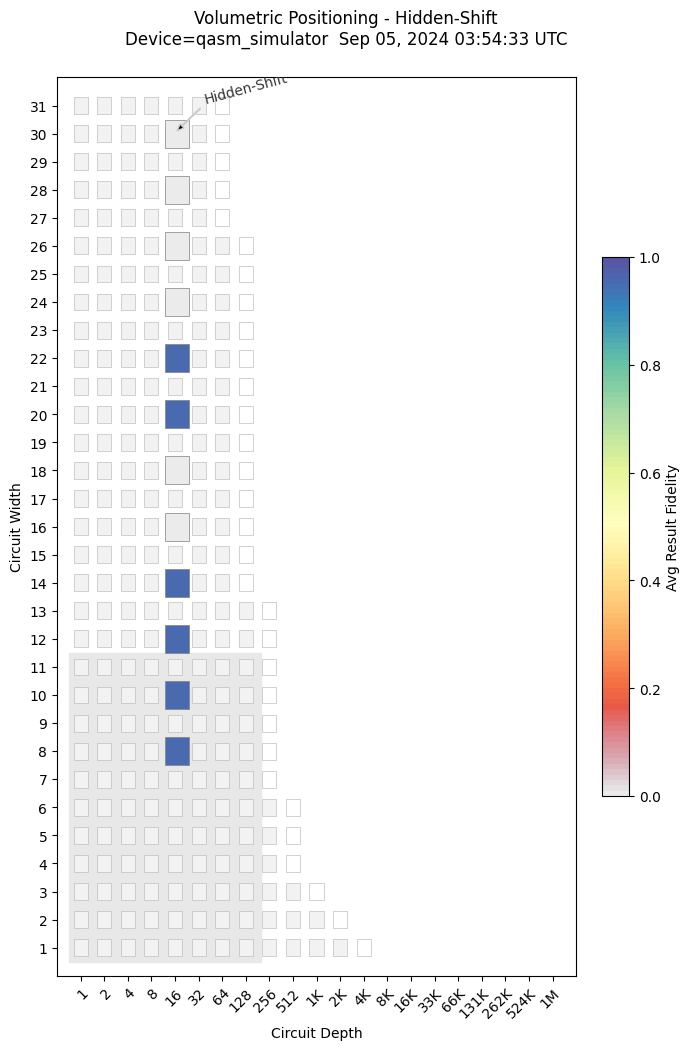

In [10]:
import sys
sys.path.insert(1, "hidden-shift/qiskit")
import hs_benchmark
hs_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Quantum Fourier Transform - Method 1

Quantum Fourier Transform (1) Benchmark Program - Qiskit
... execution starting at Sep 05, 2024 03:54:34 UTC
************
Executing [1] circuits with num_qubits = 8
... number of gates, depth = 92, 74
************
Executing [1] circuits with num_qubits = 9
... number of gates, depth = 112, 92
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 75, 0.667
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 210, 0.418, 112.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.004, 0.099, 0.025 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 10
... number of gates, depth = 135, 112
************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 93, 0.699
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 263, 0.42

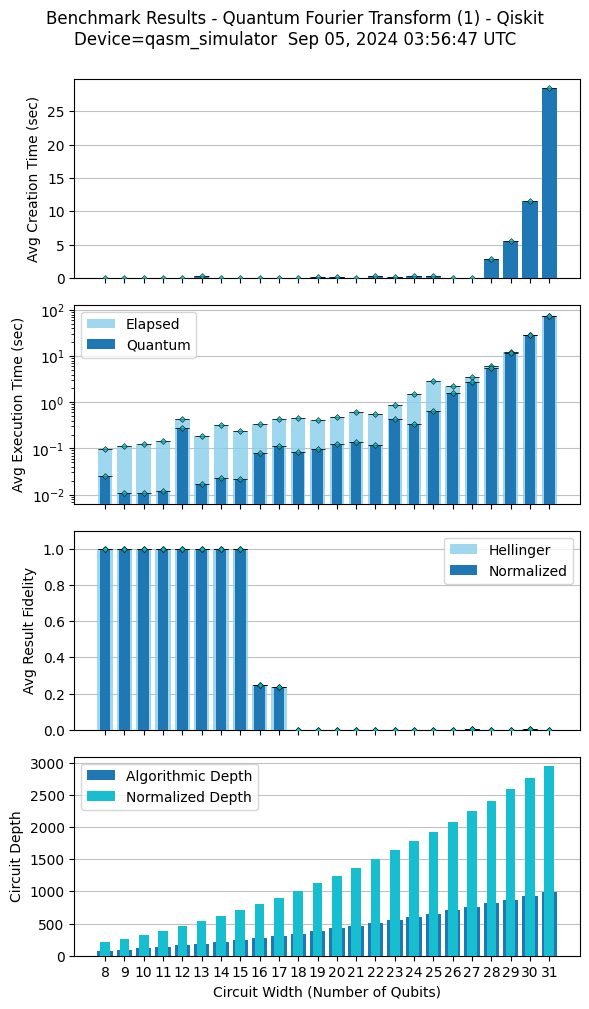

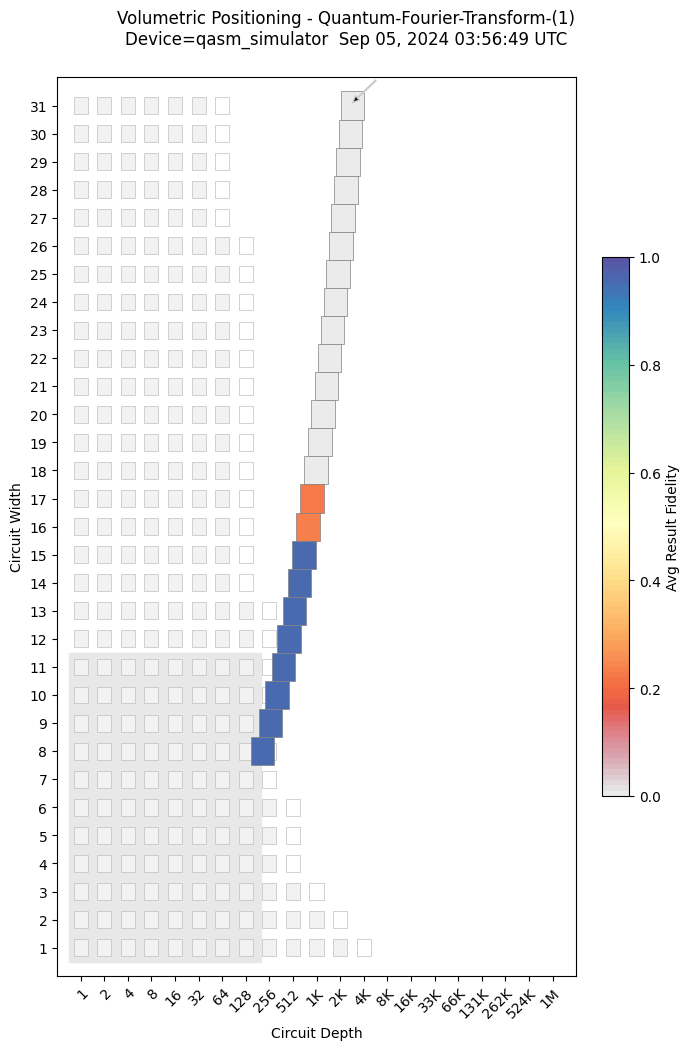

In [11]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qiskit")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Quantum Fourier Transform - Method 2

Quantum Fourier Transform (2) Benchmark Program - Qiskit
... execution starting at Sep 05, 2024 03:56:50 UTC
************
Executing [1] circuits with num_qubits = 8
... number of gates, depth = 60, 38
************
Executing [1] circuits with num_qubits = 9
... number of gates, depth = 72, 47
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 39, 0.538
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 101, 0.421, 56.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.002, 0.07, 0.024 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 10
... number of gates, depth = 85, 57
************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 48, 0.571
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 127, 0.429, 72

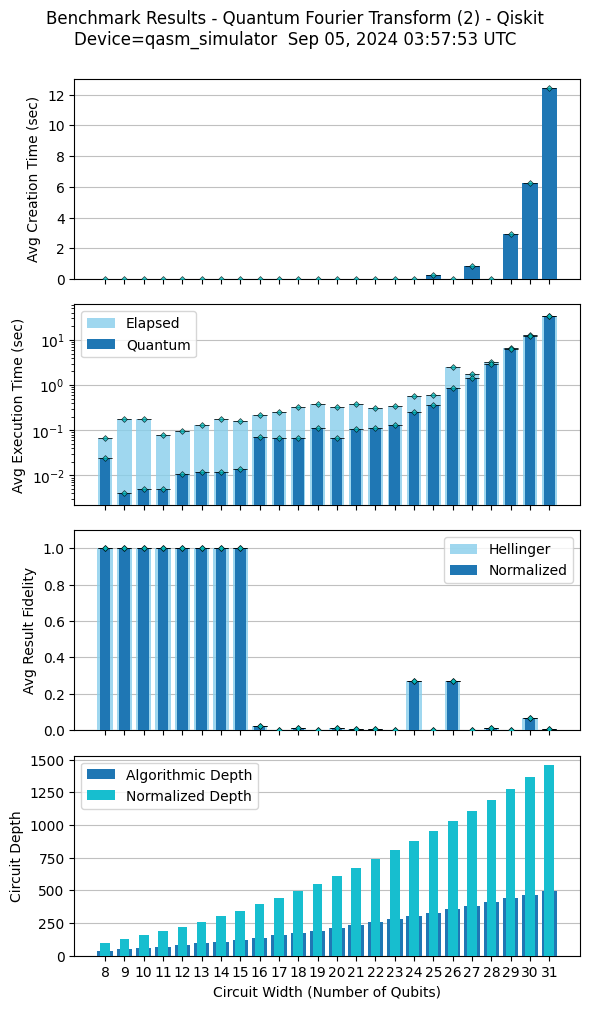

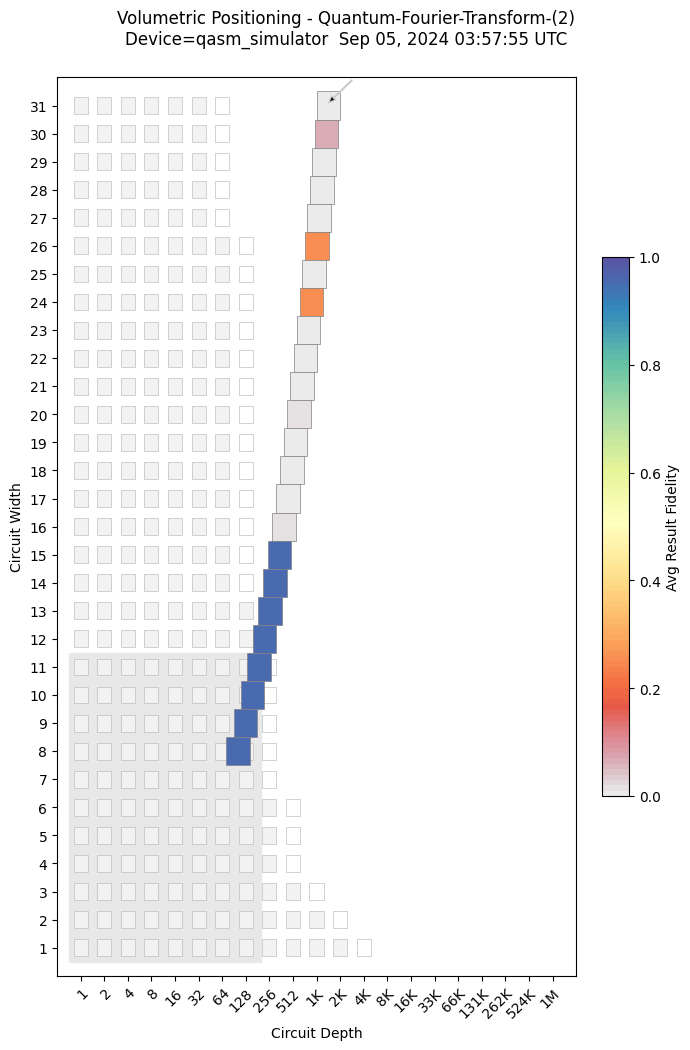

In [12]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qiskit")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Grover

Grover's Search Benchmark Program - Qiskit
... execution starting at Sep 05, 2024 03:57:56 UTC
************
Executing [1] circuits with num_qubits = 8
************
Executing [1] circuits with num_qubits = 9
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 122, 0.045
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 15279, 0.492, 9120.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.014, 3.713, 0.024 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 206, 0.038
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 43387, 0.495, 25976.0
Average Creation, Elapsed, Execution Time for the 9 qubit group = 0.018, 10.726, 0.022 secs
Average Transpi

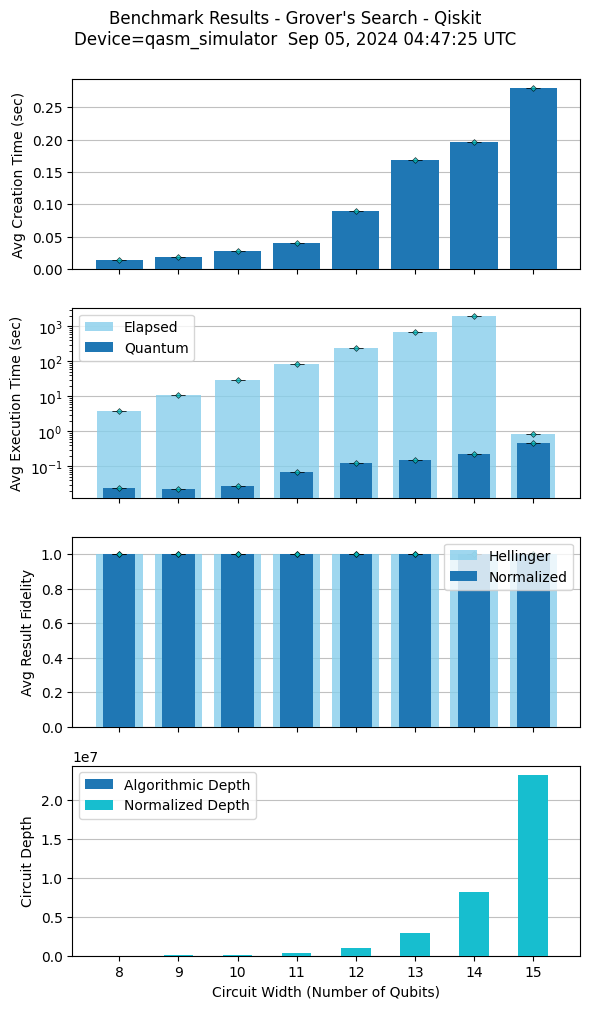

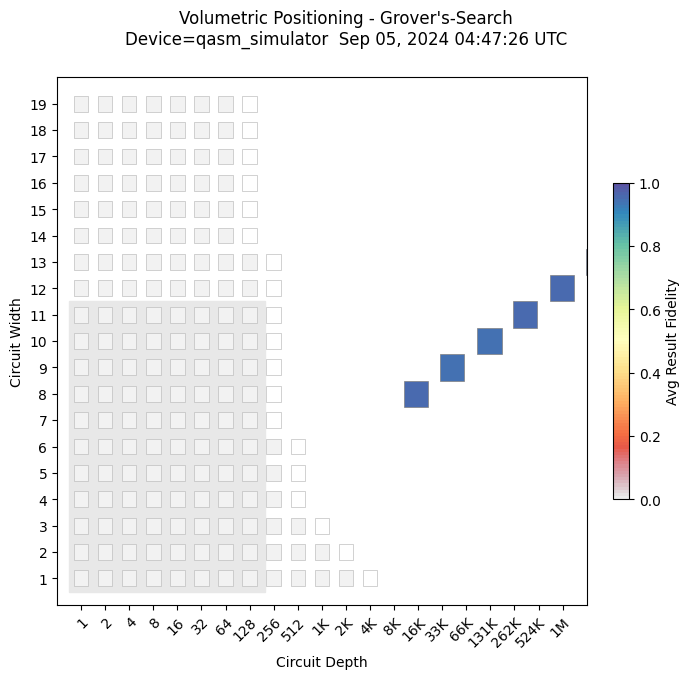

In [13]:
import sys
sys.path.insert(1, "grovers/qiskit")
import grovers_benchmark
grovers_benchmark.run(min_qubits=min_qubits, max_qubits=15, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Phase Estimation

In [ ]:
import sys
sys.path.insert(1, "phase-estimation/qiskit")
import pe_benchmark
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

Phase Estimation Benchmark Program - Qiskit
... execution starting at Sep 05, 2024 04:47:27 UTC
************
Executing [1] circuits with num_qubits = 8
************
Executing [1] circuits with num_qubits = 9
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 101, 0.418
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 109, 0.378, 56.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.012, 0.102, 0.011 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 127, 0.426
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 124, 0.388, 66.0
Average Creation, Elapsed, Execution Time for the 9 qubit group = 0.01, 0.128, 0.011 secs
Average Transpiling, Vali

### HHL Linear Solver

In [ ]:
import sys
sys.path.insert(1, "hhl/qiskit")
import hhl_benchmark

hhl_benchmark.verbose=False

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1, use_best_widths=True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

HHL Benchmark Program - Qiskit
... execution starting at Sep 05, 2024 12:14:50 UTC
************
Executing 1 circuits with 8 qubits, using 2 input qubits and 3 clock qubits
************
Executing 1 circuits with 9 qubits, using 2 input qubits and 4 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 225, 0.27
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 405, 0.332, 264.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.013, 1.804, 1.542 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 0.999, 0.998

************
Executing 1 circuits with 10 qubits, using 3 input qubits and 3 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 311, 0.278
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 552, 0.336, 356.0
Average Creation, Elapse

/home/girish/Quantum_Computing_Benchmarks/qc-app-oriented-benchmarks/hhl/qiskit/hhl_benchmark.py:813: RuntimeWarning: overflow encountered in scalar multiply
  s_int = 1000 * (i+1) + (2**off_diag_index)*(3**b)


************
Average Circuit Algorithmic Depth, ξ (xi) for the 20 qubit group = 891, 0.277
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 20 qubit group = 2095, 0.347, 1768.0
Average Creation, Elapsed, Execution Time for the 20 qubit group = 104.846, 132.241, 130.437 secs
Average Transpiling, Validating, Running Times for group 20 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 20 qubit group = 0.0, 0.0

************
Executing 1 circuits with 22 qubits, using 7 input qubits and 7 clock qubits
************
Average Circuit Algorithmic Depth, ξ (xi) for the 21 qubit group = 1241, 0.293
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 21 qubit group = 2626, 0.353, 2140.0
Average Creation, Elapsed, Execution Time for the 21 qubit group = 0.217, 146.466, 144.82 secs
Average Transpiling, Validating, Running Times for group 21 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 21 qubit group = 0.0, 0.0

************
E

### Amplitude Estimation

In [ ]:
import sys
sys.path.insert(1, "amplitude-estimation/qiskit")
import ae_benchmark
ae_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Monte Carlo

In [ ]:
import sys
sys.path.insert(1, "monte-carlo/qiskit")
import mc_benchmark
mc_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Sep 06, 2024 03:32:52 UTC
************
Executing [1] circuits with num_qubits = 8
************
Executing [1] circuits with num_qubits = 9
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 50, 0.286
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 44, 0.312, 63.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.062, 0.665, 0.554 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 0.997, 0.997

************
Executing [1] circuits with num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 50, 0.287
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 44, 0.309, 72.0
Average Creation, Elapsed, Execution Time for the 9 qubit group = 0.009, 0.131, 0.006 secs
Average Transpilin

IOStream.flush timed out


************
Average Circuit Algorithmic Depth, ξ (xi) for the 31 qubit group = 50, 0.293
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 31 qubit group = 44, 0.322, 270.0
Average Creation, Elapsed, Execution Time for the 31 qubit group = 12.992, 33.315, 33.109 secs
Average Transpiling, Validating, Running Times for group 31 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 31 qubit group = 0.0, 0.0

... execution complete at Sep 06, 2024 03:33:57 UTC in 65.314 secs

Sample Circuit:
      ┌───┐ ░  ┌───────────────┐  ┌──────────────┐ ░ ┌─────────────┐»
q1_0: ┤ X ├─░──┤ Rx(-0.025609) ├──┤ Rz(0.009192) ├─░─┤0            ├»
      └───┘ ░  ├───────────────┤ ┌┴──────────────┤ ░ │  xxyyzz_opt │»
q1_1: ──────░──┤ Rx(0.0025855) ├─┤ Rz(-0.057871) ├─░─┤1            ├»
      ┌───┐ ░  └┬──────────────┤ └┬──────────────┤ ░ ├─────────────┤»
q1_2: ┤ X ├─░───┤ Rx(0.035773) ├──┤ Rz(0.051748) ├─░─┤0            ├»
      └───┘ ░   ├──────────────┤  ├──────────────┤ ░ │

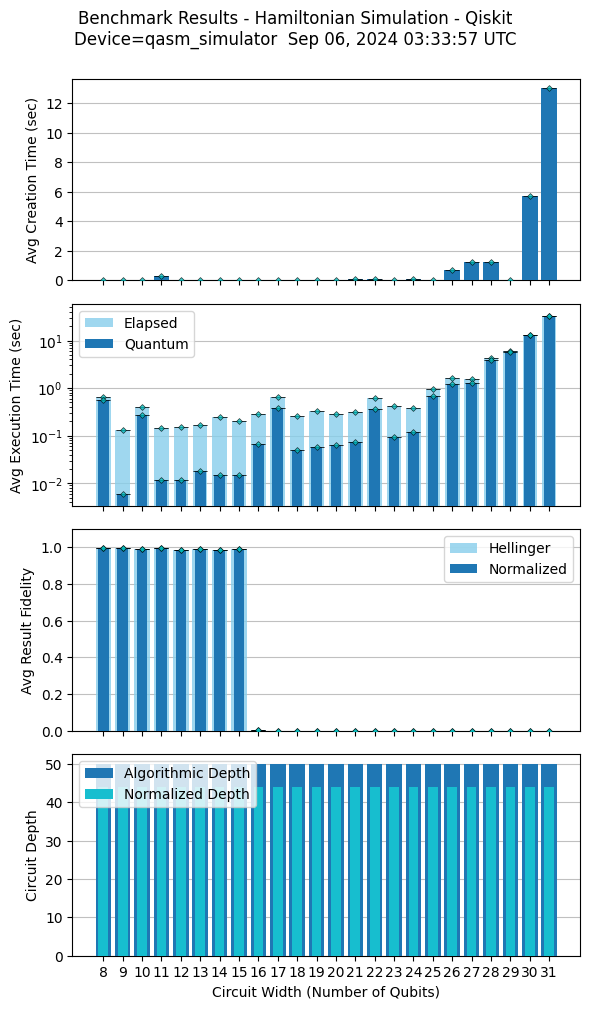

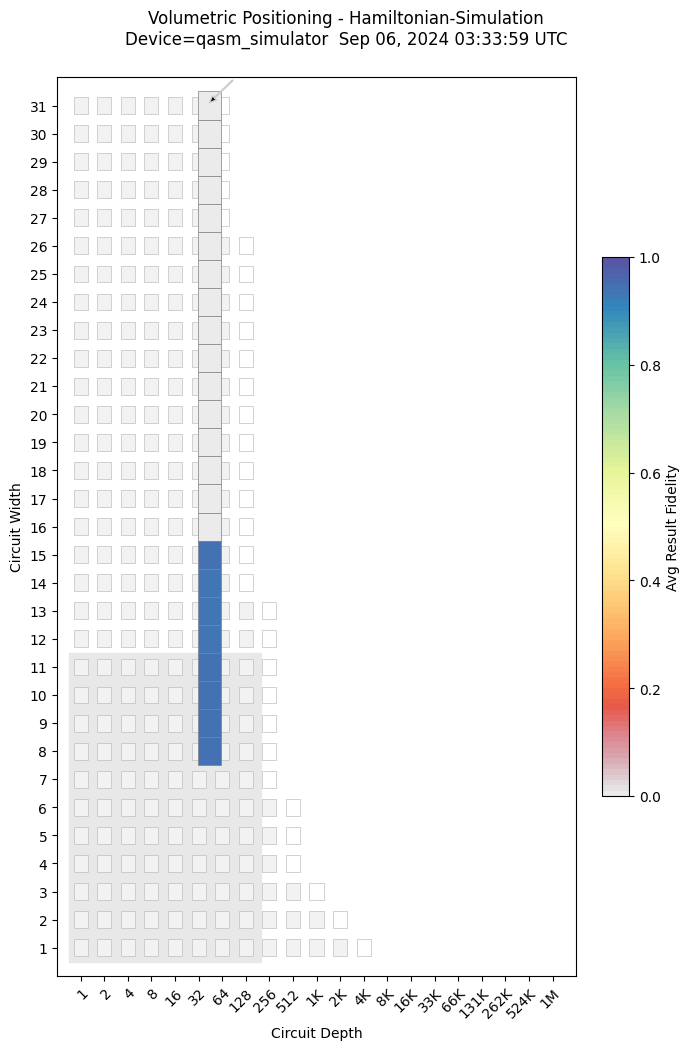

In [2]:
import sys
sys.path.insert(1, "hamiltonian-simulation/qiskit")
import hamiltonian_simulation_benchmark
hamiltonian_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### VQE - Method 1

VQE Simulation (1) Benchmark Program - Qiskit
... execution starting at Sep 06, 2024 03:34:00 UTC
************
Executing [1] circuits with num_qubits = 8
************
Executing [1] circuits with num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 26, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 1543, 0.692, 1280.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.1, 1.912, 0.086 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 0.998, 0.998

************
Executing [1] circuits with num_qubits = 12
************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 50, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 3932, 0.733, 3360.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.229, 4.421, 0.129 secs
Average Transpil

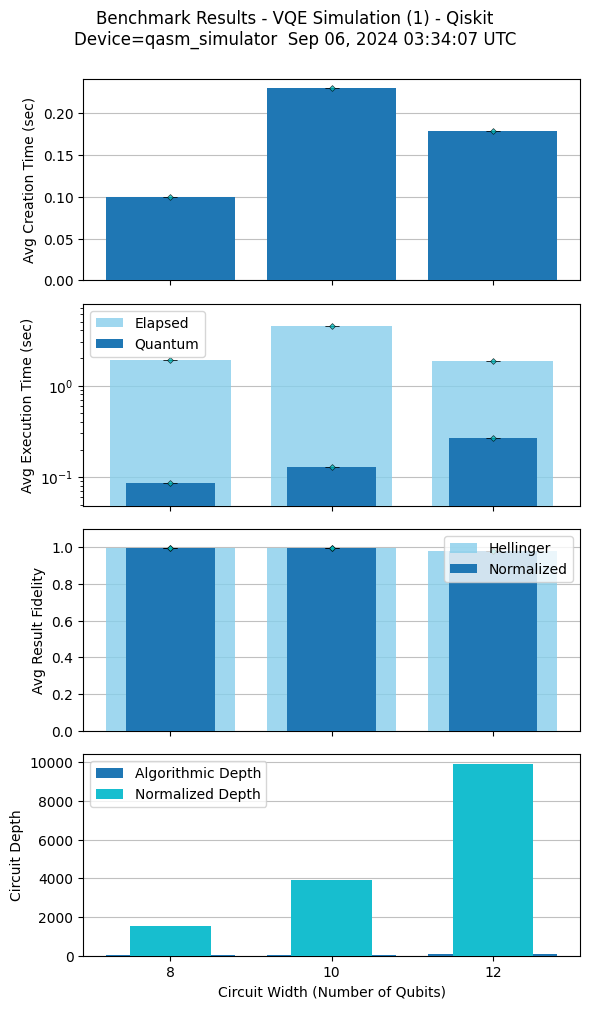

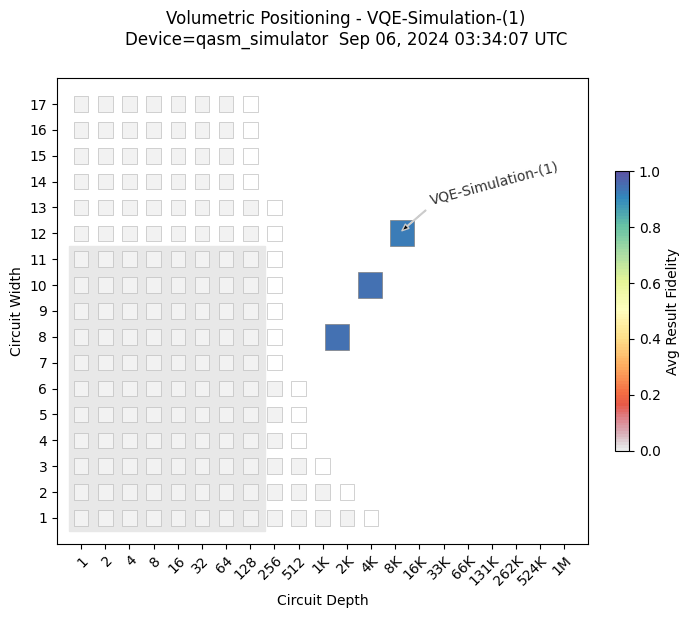

In [3]:
import sys
sys.path.insert(1, "vqe/qiskit")
import vqe_benchmark
vqe_num_shots=4098
vqe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=vqe_num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Shor - Method 1

Shor's Order Finding (1) Benchmark - Qiskit
... execution starting at Sep 06, 2024 03:34:08 UTC
************
Executing [1] circuits with num_qubits = 10
************
Executing [1] circuits with num_qubits = 14
************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 904, 0.536
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 2732, 0.425, 1644.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.385, 4.516, 0.34 secs
Average Transpiling, Validating, Running Times for group 10 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 10 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 18
************
Average Circuit Algorithmic Depth, ξ (xi) for the 14 qubit group = 2759, 0.588
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 14 qubit group = 8196, 0.43, 5070.0
Average Creation, Elapsed, Execution Time for the 14 qubit group = 1.264, 10.143, 0.22 secs
Average T

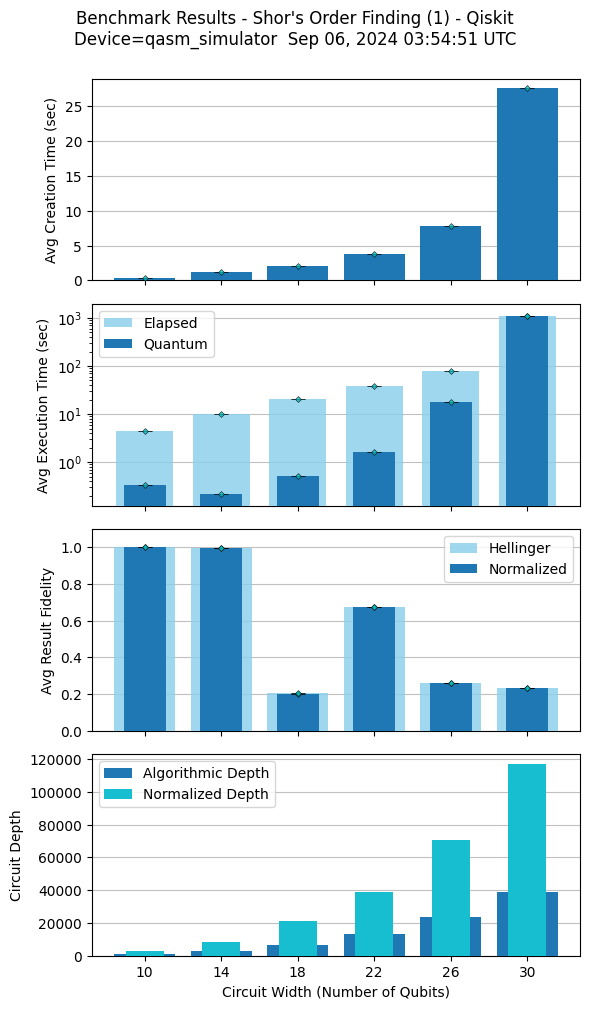

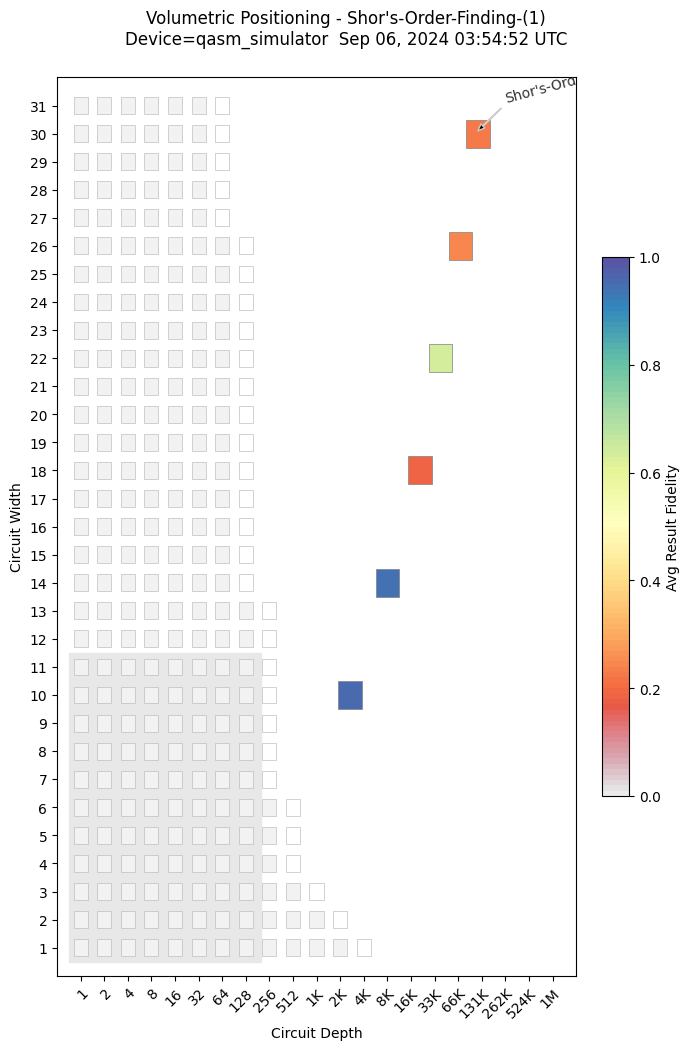

In [4]:
import sys
sys.path.insert(1, "shors/qiskit")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Shor - Method 2

Shor's Order Finding (2) Benchmark - Qiskit
... execution starting at Sep 09, 2024 05:00:45 UTC
************
Executing [1] circuits with num_qubits = 8
************
Executing [1] circuits with num_qubits = 10
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 881, 0.527
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 2752, 0.413, 1632.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.292, 7.399, 3.274 secs
Average Transpiling, Validating, Running Times for group 8 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 12
************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 2720, 0.578
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 8368, 0.416, 5040.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.902, 16.302, 6.643 secs
Average Tran

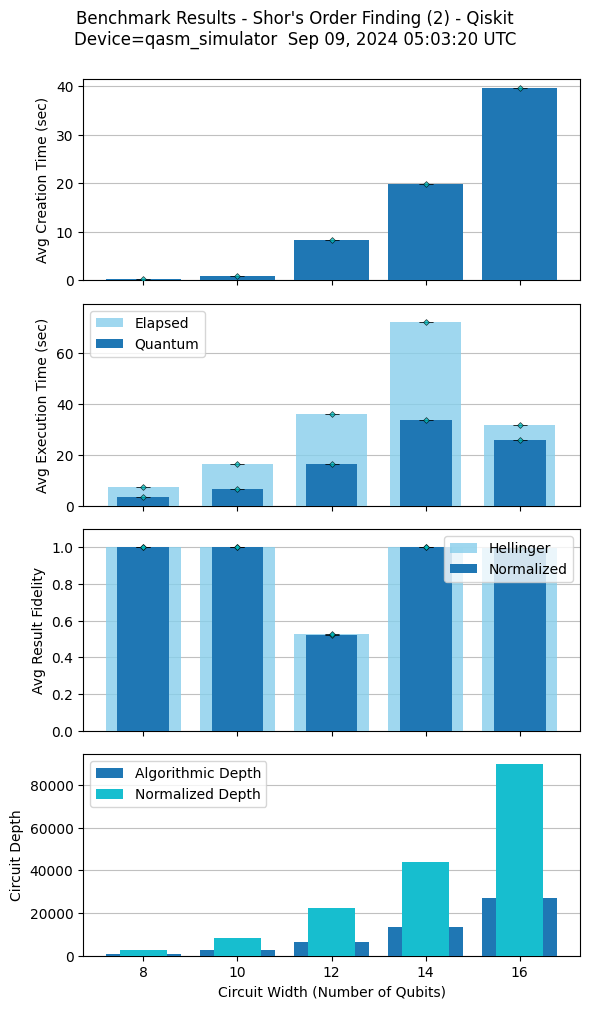

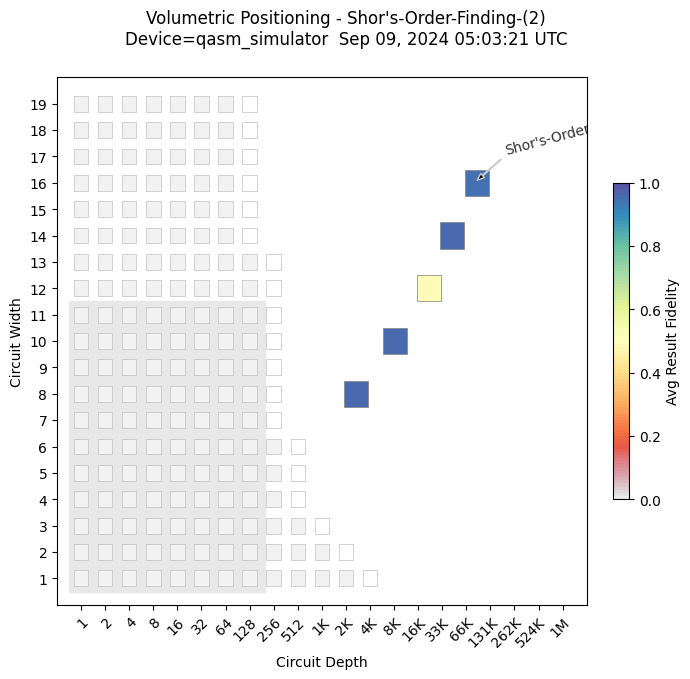

In [3]:
import sys
sys.path.insert(1, "shors/qiskit")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=16, max_circuits=1, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Combined Benchmark Results

In [ ]:
import sys
sys.path.insert(1, "_common")
import metrics

# metrics.depth_base = 2
# metrics.QV = 0
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)

In [ ]:
# ### Plot Metrics for a specific application

# metrics.plot_metrics_for_app(backend_id = "qasm_simulator", appname = "Deutsch-Jozsa", apiname="Qiskit", filters=None, options=None, suffix="")
# # metrics.plot_metrics_for_app(backend_id = "qasm_simulator", appname = "Bernstein-Vazirani (1)", apiname="Qiskit", filters=None, options=None, suffix="")